# Bike Crash Analysis

![](https://www.abbynews.com/wp-content/uploads/2021/02/24130110_web1_210204-MCR-fatal-motorcycle-accident-fatal-motorcycle-incident_1.jpg)

### Contents
1. Abstract
2. Dataset
3. Goal
4. Importing required libraries
5. Data visualization
6. Data Analysis on various factors
7. Prediction Models
    - Spliting the dataset into 70:30 ratio
    - Deploying the models
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression
        - Lasso Regression
        - Ridge Regression
        - MLP Regression
        - XgBoost Regression
        - Gradient Boosting Regression
        - Support Vector Regression
8. Comparing the accuracy of the models
9. Conclusion

### Abstract
The objectives of the present project were to describe the main characteristics of bicycle crashes with regard to the road environment, crash opponent, cyclist, and crash dynamics; compare individuals who describe their health after the crash as declined with those who describe their health as not affected; and compare the number of injured cyclists who describe their health as declined after the crash with the predicted number of permanent medical impairments within the same population.

### Dataset


### Goal
The goal of this project to analyze the dataset on various factors and depending on the various factors making of a prediction model which will predict the accident prone sights.

### Importing the required libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv('D:\ML\Bike Crash Analysis\Dataset\BikePedCrash.csv')
data.head()

,X,Y,OBJECTID_1,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,...,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID
0,-78.883896,36.039490,1,Yes,11,Nov-15,.,No,With Traffic,B: Suspected Minor Injury,...,None,No Special Feature,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Clear,No,1
1,-78.782800,35.751118,2,Yes,20,20-24,.,No,Facing Traffic,C: Possible Injury,...,None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,2
2,-80.697820,35.084732,3,Yes,37,30-39,.,No,Unknown,B: Suspected Minor Injury,...,None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Cloudy,No,3
3,-80.479320,35.684400,4,Yes,30,30-39,.,No,With Traffic,C: Possible Injury,...,None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Cloudy,No,4
4,-78.904450,34.999428,5,Yes,45,40-49,.,No,With Traffic,B: Suspected Minor Injury,...,None,No Special Feature,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,5


**Information about the dataset**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12173 entries, 0 to 12172
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           12173 non-null  float64
 1   Y           12173 non-null  float64
 2   OBJECTID_1  12173 non-null  int64  
 3   AmbulanceR  12173 non-null  object 
 4   BikeAge     12173 non-null  object 
 5   BikeAgeGrp  12173 non-null  object 
 6   BikeAlcDrg  12173 non-null  object 
 7   BikeAlcFlg  12173 non-null  object 
 8   BikeDir     12173 non-null  object 
 9   BikeInjury  12173 non-null  object 
 10  BikePos     12173 non-null  object 
 11  BikeRace    12173 non-null  object 
 12  BikeSex     12173 non-null  object 
 13  City        12173 non-null  object 
 14  County      12173 non-null  object 
 15  CrashAlcoh  12173 non-null  object 
 16  CrashDay    12173 non-null  object 
 17  CrashGrp    12173 non-null  object 
 18  CrashHour   12173 non-null  int64  
 19  CrashID     12173 non-nul

**Columns of the dataset**

In [5]:
data.columns

Index(['X', 'Y', 'OBJECTID_1', 'AmbulanceR', 'BikeAge', 'BikeAgeGrp',
       'BikeAlcDrg', 'BikeAlcFlg', 'BikeDir', 'BikeInjury', 'BikePos',
       'BikeRace', 'BikeSex', 'City', 'County', 'CrashAlcoh', 'CrashDay',
       'CrashGrp', 'CrashHour', 'CrashID', 'CrashLoc', 'CrashMonth',
       'CrashSevr', 'CrashType', 'CrashYear', 'Developmen', 'DrvrAge',
       'DrvrAgeGrp', 'DrvrAlcDrg', 'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace',
       'DrvrSex', 'DrvrVehTyp', 'HitRun', 'Latitude', 'LightCond', 'Locality',
       'Longitude', 'NumBicsAin', 'NumBicsBin', 'NumBicsCin', 'NumBicsKil',
       'NumBicsNoi', 'NumBicsTot', 'NumBicsUin', 'NumLanes', 'NumUnits',
       'RdCharacte', 'RdClass', 'RdConditio', 'RdConfig', 'RdDefects',
       'RdFeature', 'RdSurface', 'Region', 'RuralUrban', 'SpeedLimit',
       'TraffCntrl', 'Weather', 'Workzone', 'OBJECTID'],
      dtype='object')

------------------------------------
## Exploratory Data Analysis
Exploratory Data Analysis - does this for Machine Learning enthusiast. It is a way of visualizing, summarizing and interpreting the information that is hidden in rows and column format.

**Availability of ambulance at the sight of the accident**

Text(0.5, 1.0, 'Availability of Ambulance')

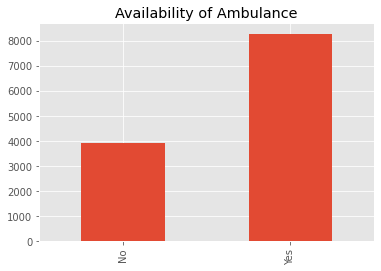

In [6]:
data['AmbulanceR'].value_counts().sort_index().plot.bar()
plt.title("Availability of Ambulance")

Observation : The graph shows that more than 8000 times the ambulance was there at the sight of the accident to rescue the biker.

**Age Group wise Analysis**

Text(0.5, 1.0, 'Age group Analysis')

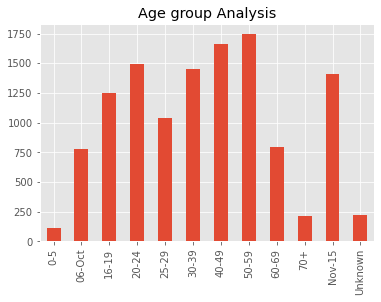

In [7]:
data['BikeAgeGrp'].value_counts().sort_index().plot.bar()
plt.title("Age group Analysis")

Observation : The age group between 50-59 years is the most accident prone age group.

**License of the accidented bike**

Text(0.5, 1.0, 'License')

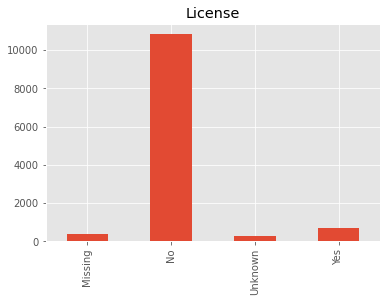

In [8]:
data['BikeAlcFlg'].value_counts().sort_index().plot.bar()
plt.title("License")

Observation : It shows more than 10000 cases the biker is not having the license.

**Position of the bikes at the time of the accident**

Text(0.5, 1.0, 'Position of the bikes')

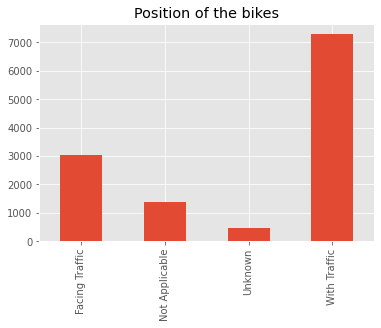

In [9]:
data['BikeDir'].value_counts().sort_index().plot.bar()
plt.title("Position of the bikes")

Observation : Unfortunately in most of the cases the accident was happened in the traffic areas.

**Injuries due to bike accident**

Text(0.5, 1.0, 'Injuries')

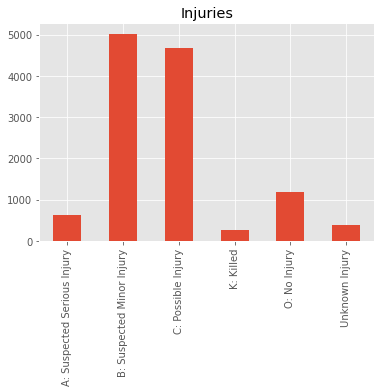

In [10]:
data['BikeInjury'].value_counts().sort_index().plot.bar()
plt.title("Injuries")

Observation : In most of the cases the biker got minor and suspected to be injured. Very few cases were reported to be severe or, killed.

**Bike Riding Area**

Text(0.5, 1.0, 'Bike Riding Area')

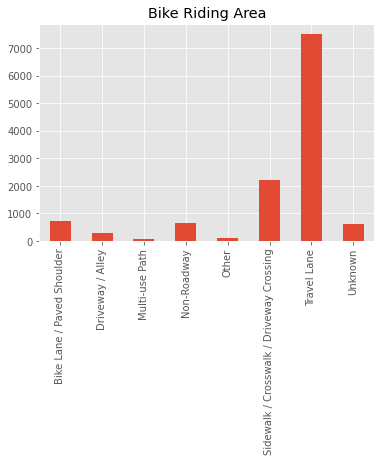

In [11]:
data['BikePos'].value_counts().sort_index().plot.bar()
plt.title("Bike Riding Area")

Observation : The data shows that the accidents happened in the main roads or the travel roads.

**Bike Rider Identification or, Ethnicity**

Text(0.5, 1.0, 'Bike Rider Identification')

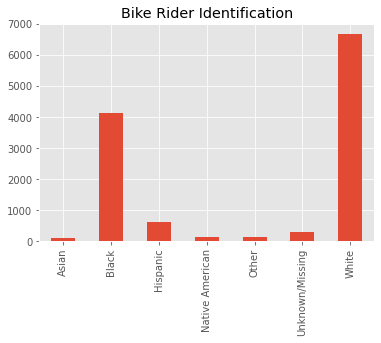

In [12]:
data['BikeRace'].value_counts().sort_index().plot.bar()
plt.title("Bike Rider Identification")

Observation : In most of the cases the bike crashing scenarios happened with White ethnic people. As the dataset is based on US territories.

**Gender wise Analysis**

Text(0.5, 1.0, 'Gender wise analysis')

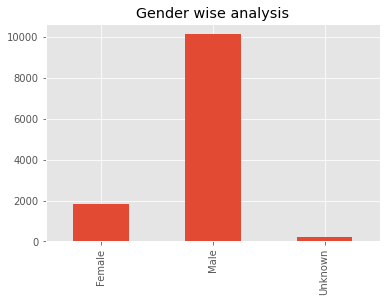

In [13]:
data['BikeSex'].value_counts().sort_index().plot.bar()
plt.title("Gender wise analysis")

Observation : Males are victim of the bike crashes as compared to the females.

**Alcohol consumption by the biker during the ride**

Text(0.5, 1.0, 'Alcohol consumption during Accident')

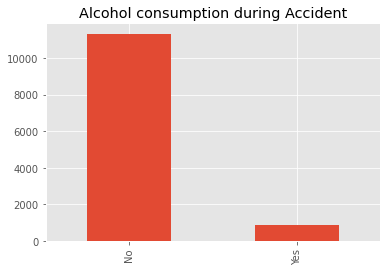

In [14]:
data['CrashAlcoh'].value_counts().sort_index().plot.bar()
plt.title("Alcohol consumption during Accident")

Observation : Most of the cases the bikers were not drunk.

**On which weekday the crash happened more!**

Text(0.5, 1.0, 'Day of Accident')

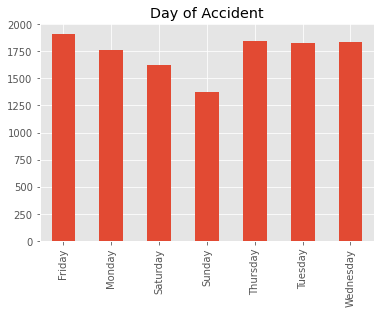

In [15]:
data['CrashDay'].value_counts().sort_index().plot.bar()
plt.title("Day of Accident")

Observation : Although everyday is having more or less equal shares but in the Sundays the accident counts decreases

**Type of Accident**

Text(0.5, 1.0, 'Type of Accident')

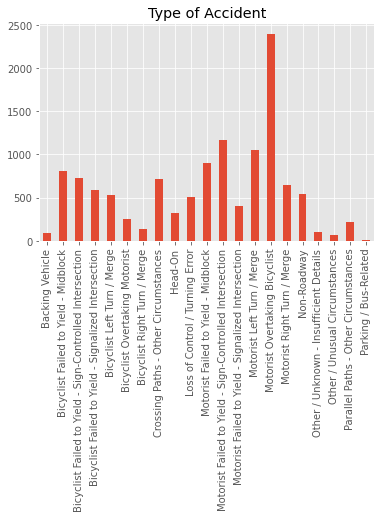

In [16]:
data['CrashGrp'].value_counts().sort_index().plot.bar()
plt.title("Type of Accident")

Observation : In most of the cases overtaking the main cause for the accidents.

**Location of the Accidents**

Text(0.5, 1.0, 'Location of Accident')

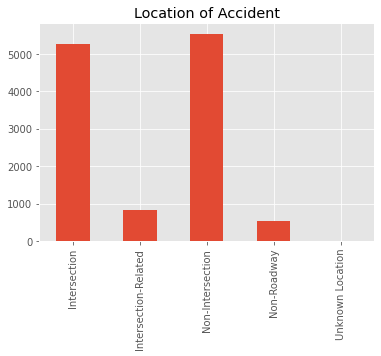

In [17]:
data['CrashLoc'].value_counts().sort_index().plot.bar()
plt.title("Location of Accident")

Observation : Both the Intersection and Non-intersection areas are accident prone

**Region of Accident**

Text(0.5, 1.0, 'Region of Accident')

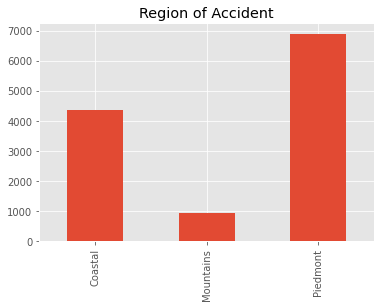

In [18]:
data['Region'].value_counts().sort_index().plot.bar()
plt.title("Region of Accident")

Observation : Piedmont areas are the accident prone areas.

**Weather wise analysis**

Text(0.5, 1.0, 'Weather')

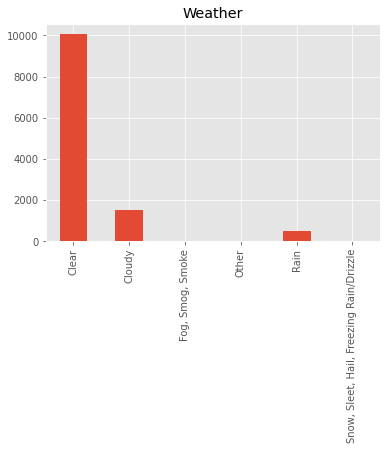

In [19]:
data['Weather'].value_counts().sort_index().plot.bar()
plt.title("Weather")

Observation :  Accidents were happened in the clear weathers.

**Traffic Control at the time of the accident**

Text(0.5, 1.0, 'Traffic Control at the time of accident')

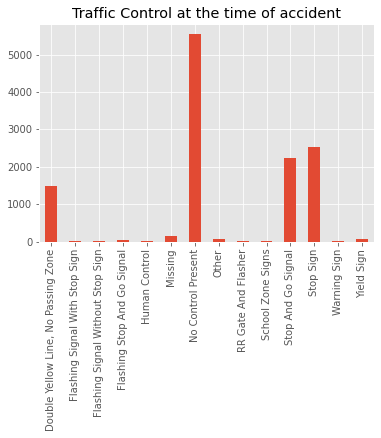

In [20]:
data['TraffCntrl'].value_counts().sort_index().plot.bar()
plt.title("Traffic Control at the time of accident")

Observation : The areas which are not controlled by the traffics are the most accident prone

**Speed of the bike at the time of the accident**

Text(0.5, 1.0, 'Speed of the bike at the time of accident')

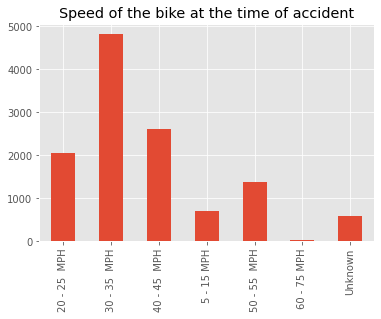

In [21]:
data['SpeedLimit'].value_counts().sort_index().plot.bar()
plt.title("Speed of the bike at the time of accident")

Observation : Most of the cases the crashes happened in the speed limit of 30-35 MPH

**Year wise Analysis**

Text(0.5, 1.0, 'Year wise analysis')

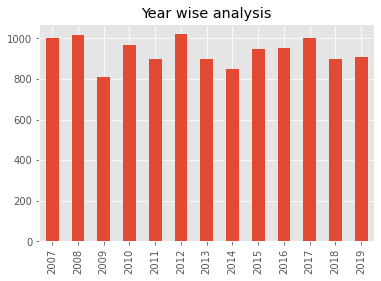

In [22]:
data['CrashYear'].value_counts().sort_index().plot.bar()
plt.title("Year wise analysis")

Observation : 2012 is the year, which was more accident prone as compared to the others

**Whether the biker committed accident and then ran away or not!**

Text(0.5, 1.0, 'Whether the biker committed accident and then ran away or not!')

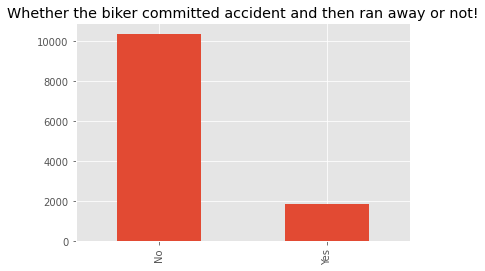

In [23]:
data['HitRun'].value_counts().sort_index().plot.bar()
plt.title("Whether the biker committed accident and then ran away or not!")

**Rural or, Urban area, which one is more accident prone?**

Text(0.5, 1.0, 'Rural or, Urban')

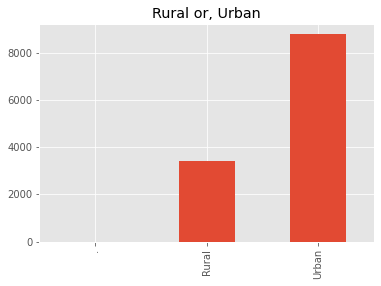

In [24]:
data['RuralUrban'].value_counts().sort_index().plot.bar()
plt.title("Rural or, Urban")

**Locality wise Analysis**

Text(0.5, 1.0, 'Locality wise analysis')

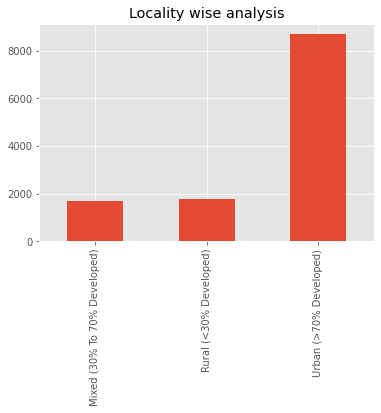

In [25]:
data['Locality'].value_counts().sort_index().plot.bar()
plt.title("Locality wise analysis")

**Finding out the correlation between the attributes of the dataset**

In [26]:
data.corr()

,X,Y,OBJECTID_1,CrashHour,CrashID,CrashYear,Latitude,Longitude,NumUnits,OBJECTID
X,1.000000,-0.108806,0.006437,-0.007031,-0.000004,-0.001329,-0.108806,1.000000,-0.004496,0.006437
Y,-0.108806,1.000000,-0.020657,0.007790,-0.022339,-0.021853,1.000000,-0.108806,-0.009966,-0.020657
OBJECTID_1,0.006437,-0.020657,1.000000,-0.023383,0.982901,0.983638,-0.020657,0.006437,-0.010489,1.000000
CrashHour,-0.007031,0.007790,-0.023383,1.000000,-0.026130,-0.024659,0.007790,-0.007031,-0.002736,-0.023383
CrashID,-0.000004,-0.022339,0.982901,-0.026130,1.000000,0.995621,-0.022339,-0.000004,-0.007425,0.982901
CrashYear,-0.001329,-0.021853,0.983638,-0.024659,0.995621,1.000000,-0.021853,-0.001329,-0.006806,0.983638
Latitude,-0.108806,1.000000,-0.020657,0.007790,-0.022339,-0.021853,1.000000,-0.108806,-0.009966,-0.020657
Longitude,1.000000,-0.108806,0.006437,-0.007031,-0.000004,-0.001329,-0.108806,1.000000,-0.004496,0.006437
NumUnits,-0.004496,-0.009966,-0.010489,-0.002736,-0.007425,-0.006806,-0.009966,-0.004496,1.000000,-0.010489
OBJECTID,0.006437,-0.020657,1.000000,-0.023383,0.982901,0.983638,-0.020657,0.006437,-0.010489,1.000000


***************
##   Prediction Model Creation

Predictive modeling, also called predictive analytics, is a mathematical process that seeks to predict future events or outcomes by analyzing patterns that are likely to forecast future results.

Now to build that prediction model I amgoing to use regression algorithms. Now let's find out what is regression algorithms?

Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

Here we are going to prepare several Regression machine learning models based on those we will do a comparative analysis that which model is better among them.

I have decided to go with nine regression models to evaluate this dataset - 

* **Linear Regression** : Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).


* **Random Forest Regression** : Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.


* **Decision Tree Regression** : Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.


* **Lasso Regression** : In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.


* **Ridge Regression** : Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.


* **XgBoost Regressor** : XGBoost is a powerful approach for building supervised regression models. ... Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.


* **MLP Regressor** : A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.


* **Gradient Boosting Regressor** : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


* **Support Vector Machine Regressor** : Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

Let's deploy the models...

**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 70:30 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [27]:
x = data[['CrashID','CrashYear']]

In [28]:
y = data['OBJECTID']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [30]:
x_train.shape

(8521, 2)

In [31]:
y_train.shape

(8521,)

In [32]:
x_test.shape

(3652, 2)

In [33]:
y_test.shape

(3652,)

### Random Forest Regression 
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
regressor = RandomForestRegressor(n_estimators=500, criterion='mse',random_state=0)
regressor.fit(x_train, y_train)

RandomForestRegressor(criterion='mse', n_estimators=500, random_state=0)

In [36]:
from sklearn import metrics
y_pred = regressor.predict(x_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 271.09648764473474
Residual Sum of Squares(MSE): 365582.24584308936
R2-Score: 0.9704219867017381


### Simple Linear Regression
Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [37]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred = regr.predict(x_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 401.68552086630336
Residual Sum of Squares(MSE): 380782.7157093754
R2-Score: 0.9691921685008897


In [39]:
y_pred = regr.predict(x_test)
ds = pd.DataFrame()
ds['ObjectID']=y_test
ds['Predicted ID']=y_pred
ds.head(5)

,ObjectID,Predicted ID
6458,6459,6110.045276
9446,9447,8797.087889
600,601,759.359758
8483,8484,6951.748272
8502,8503,6961.235735


<AxesSubplot:>

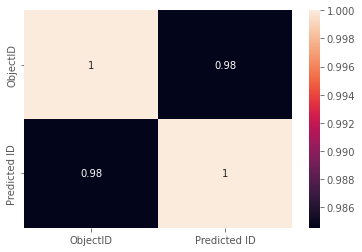

In [40]:
sns.heatmap(ds.corr(), annot = True)

### Decision Tree Regressor
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [42]:
y_pred = dtr.predict(x_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 270.26396495071197
Residual Sum of Squares(MSE): 502836.8733570646
R2-Score: 0.9593171826692173


### Lasso Regression
In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [43]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [44]:
y_pred = lasso.predict(x_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 401.6243607261031
Residual Sum of Squares(MSE): 380800.6283476184
R2-Score: 0.9691907192503909


### Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [45]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [46]:
y_pred = ridge.predict(x_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 401.6821761789727
Residual Sum of Squares(MSE): 380783.6976646297
R2-Score: 0.9691920890542375


### XgBoost Regressor 
XGBoost is a powerful approach for building supervised regression models. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.

In [47]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
y_pred = xgb.predict(x_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 281.691588218737
Residual Sum of Squares(MSE): 293386.5779559801
R2-Score: 0.9762630920867035


### MLP Regressor 
A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [49]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(x_train, y_train)

MLPRegressor()

In [50]:
y_pred = mlp.predict(x_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 3009.847023639743
Residual Sum of Squares(MSE): 12175288.406452464
R2-Score: 0.014938918694668901


### Gradient Boosting Regressor 
Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [52]:
y_pred = gb.predict(x_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 288.2146858594827
Residual Sum of Squares(MSE): 259281.14984872882
R2-Score: 0.9790224460147718


### Support Vector Machine Regressor 
Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

In [53]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train, y_train)

SVR()

In [54]:
y_pred = svm.predict(x_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 3045.1892659813216
Residual Sum of Squares(MSE): 12357294.014595963
R2-Score: 0.000213465368532062


------------------------
### Comparative analysis among the algorithms for this project

We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Linear Regression|96.91%|
|Decision Tree Regressor|95.93%|
|Random Forest Regressor|97.04%|
|Lasso Regression|96.91%|
|Ridge Regression|96.91%|
|XgBoost Regressor|97.89%|
|MLP Regressor|0.03%|
|Gradient Boosting Regressor|97.90%|
|Support Vector Regressor|0.02%|

### Conclusion

**Comparing all those scores scored by the machine learning algorithms, it is clear that Gradient Boosting Regression is having the upper hand in case of this dataset and after this, we can use  XgBoosting Regressor, which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Gradient Boosting
2. XgBoosting Regressor
3. Random Forest
4. Linear Regression
5. Lasso Regressor
6. Ridge Regressor
7. Decision Tree Regressor
8. MLP Regressor
9. Support Vector Regressor


Hooray!! The models are deployed successfully!

## Hope this project will help you! Thank you!